In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

In [126]:
data = pd.read_csv('var20.csv', index_col = 0)
data

,aiycq,lajvp,vmacy
0,6.033037,23.481840,26.562331
1,20.317504,14.053025,25.577565
2,18.275640,1.865131,22.443146
3,17.140440,26.206349,6.672387
4,16.889143,14.243667,1.741996
...,...,...,...
95,-2.308893,5.663305,25.269526
96,8.541314,-11.590692,26.880542
97,14.562635,-5.806439,15.658215
98,-2.061151,17.732449,27.091822


In [127]:
cols = list(data.keys())
avg = []
var = []
for i in range(len(cols)):
    print("Среднее значение столбца", cols[i], ":", data[cols[i]].mean())
    avg.append(data[cols[i]].mean())
    print("Дисперсия столбца", cols[i], ":", data[cols[i]].var())
    var.append(data[cols[i]].var())

Среднее значение столбца aiycq : 11.120771820578238
Дисперсия столбца aiycq : 227.37800238226583
Среднее значение столбца lajvp : 11.927328119591174
Дисперсия столбца lajvp : 443.68830710680606
Среднее значение столбца vmacy : 16.461246955978847
Дисперсия столбца vmacy : 529.4917987836154


Визуализация датасета:

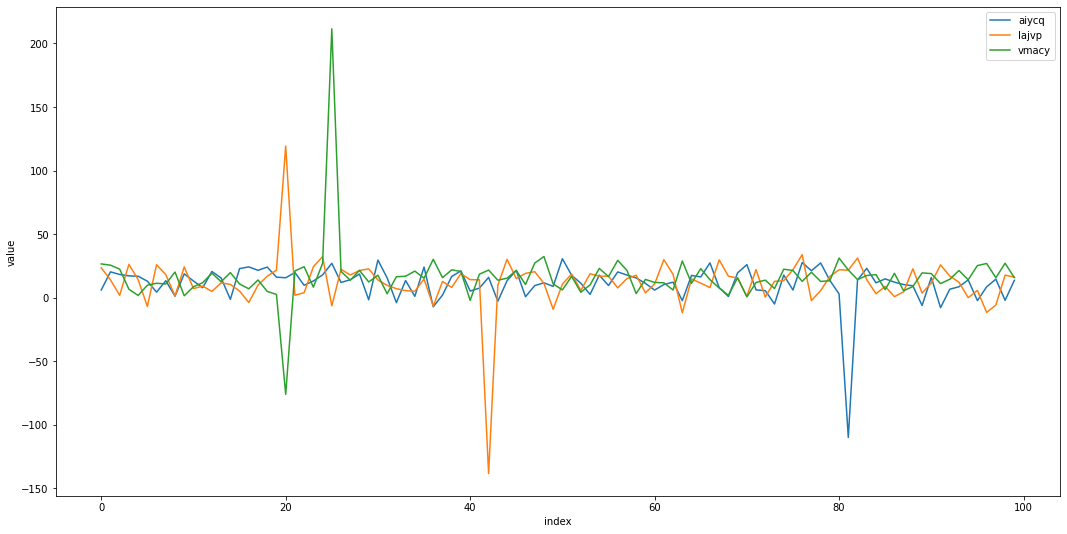

In [128]:
cols = list(data.keys())
pl.figure(figsize = (18, 9))
pl.xlabel("index")
pl.ylabel("value")
for i in range(len(cols)):
        pl.plot(range(len(data[cols[i]])), data[cols[i]], label = cols[i])
pl.legend()

Графики для каждой пары в наборе данных:

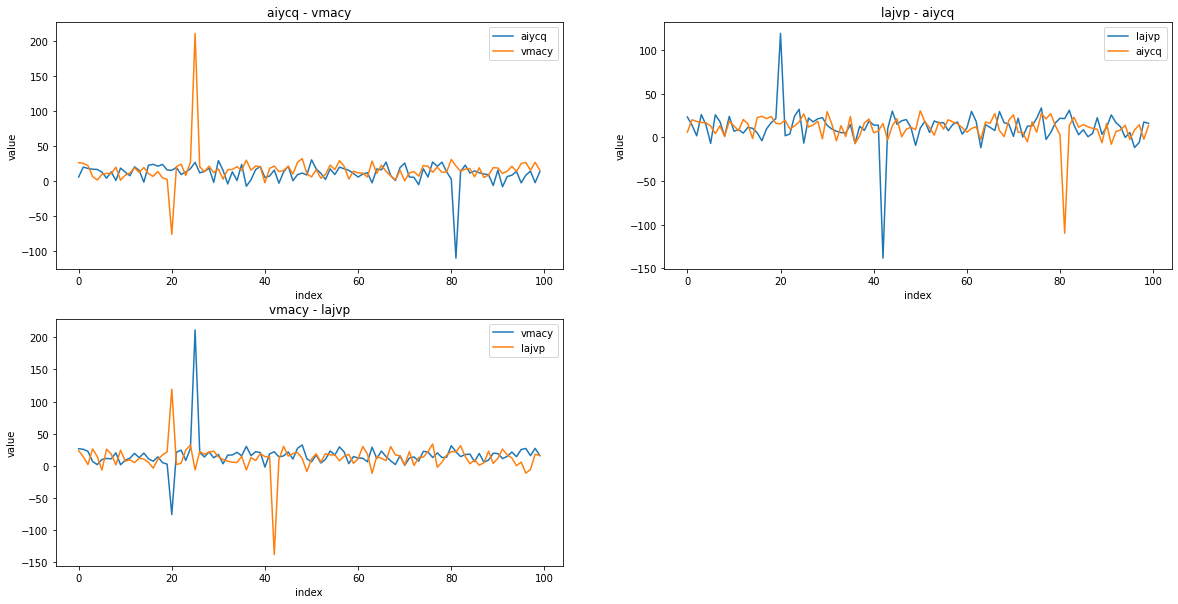

In [129]:
def drawGraphs(xaxis, yaxis1, yaxis2, name, label1, label2):
    pl.title(name)
    pl.xlabel('index')
    pl.ylabel('value')
    pl.plot(xaxis, yaxis1, label = label1)
    pl.plot(xaxis, yaxis2, label = label2)
    pl.legend()


pl.figure(figsize = (20, 10))
args = 221
for i in range(len(cols)):
    pl.subplot(args)
    args += 1
    drawGraphs(range(len(data[cols[i]])), data[cols[i]], data[cols[i - 1]], cols[i] + ' - ' + cols[i-1], cols[i], cols[i - 1])


Гистограмма каждого из признаков:

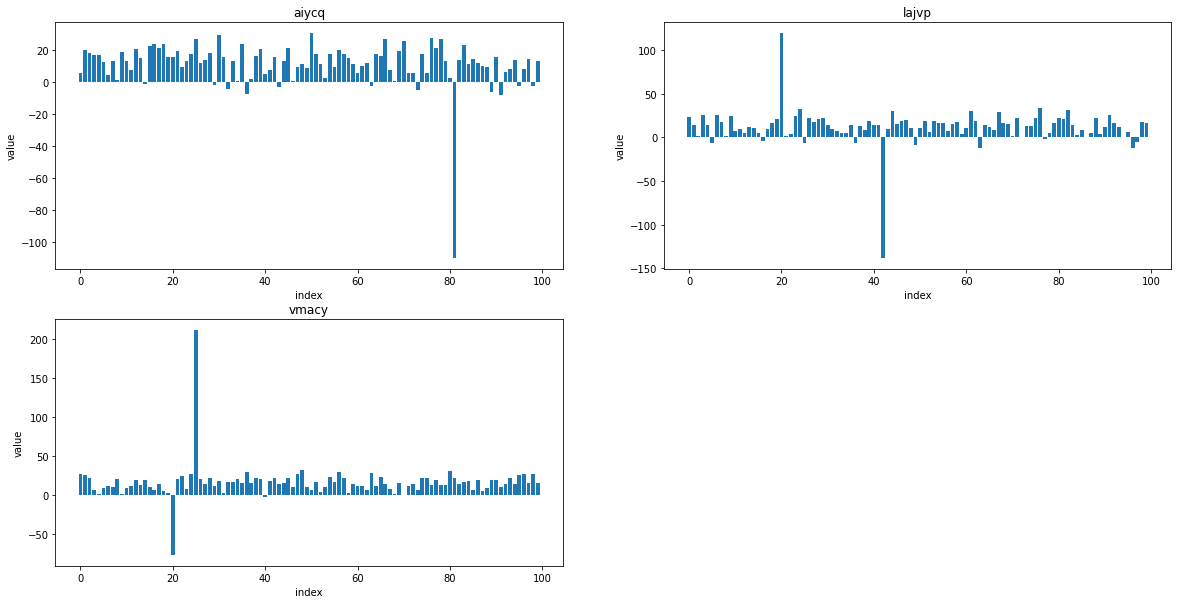

In [130]:
pl.figure(figsize = (20, 10))
args = 221
for i in cols:
    pl.subplot(args)
    args += 1
    pl.bar(range(len(data[i])),  data[i])
    pl.title(i)
    pl.xlabel('index')
    pl.ylabel('value')

Найдём и удалим выбросы, используя квантили(5й и 95й процентили):

In [131]:
low = .05
high = .95
quant_data = data.quantile([low, high])
print(quant_data)

          aiycq      lajvp      vmacy
0.05  -3.935571  -6.659224   1.862907
0.95  27.050448  29.869688  28.886264


In [132]:
data = data.apply(lambda x: x[(x > quant_data.loc[low, x.name]) & 
                                    (x < quant_data.loc[high, x.name])], axis = 0)

Гистограммы датасета после избавления от выбросов:

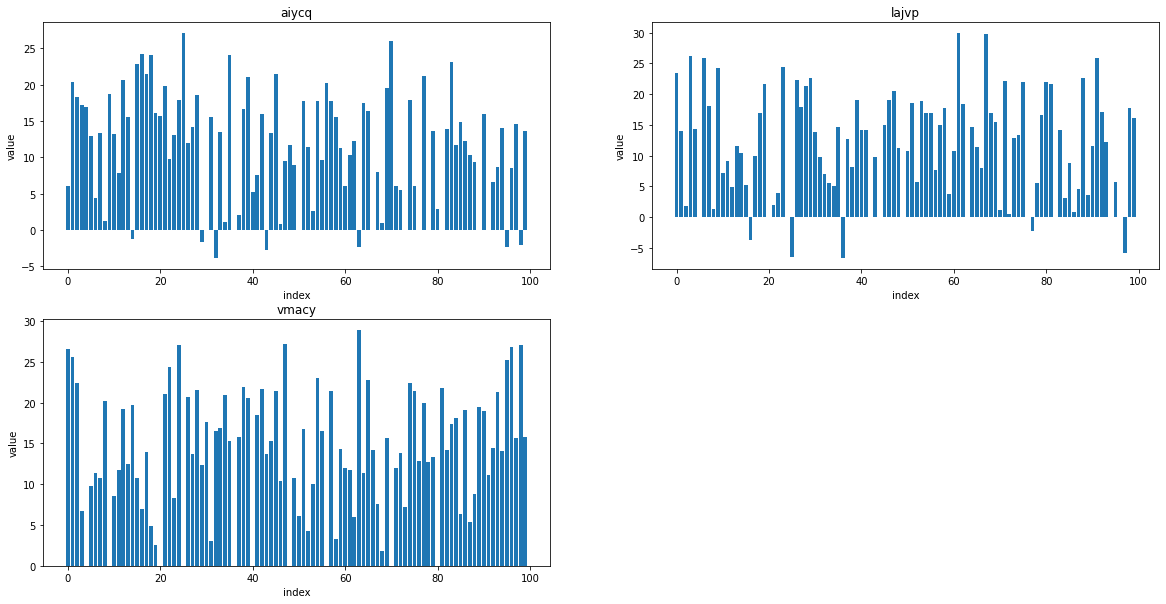

In [133]:
pl.figure(figsize = (20, 10))
args = 221
for i in cols:
    pl.subplot(args)
    args += 1
    pl.bar(range(len(data[i])),  data[i])
    pl.title(i)
    pl.xlabel('index')
    pl.ylabel('value')

Найдём новые средние значения и дисперсии столбцов:

In [134]:
new_avg = []
new_var = []
for i in range(len(cols)):
    new_avg.append(data[cols[i]].mean())
    new_var.append(data[cols[i]].var())

Сравнение новых и старых значений:

In [135]:
print("Старые средние значения :", avg)
print("Новые средние значения :", new_avg)
print("Старые дисперсии :", var)
print("Новые дисперсии :", new_var)

Старые средние значения : [11.120771820578238, 11.927328119591174, 16.461246955978847]
Новые средние значения : [12.286214397324173, 12.486204336536462, 15.398854729412115]
Старые дисперсии : [227.37800238226583, 443.68830710680606, 529.4917987836154]
Новые дисперсии : [55.778691339621496, 70.63788415060725, 43.54542773575074]


Нормализуем данные по среднему и дисперсии:

In [136]:
normalized_data = (data - data.mean()) / data.std()
for i in range(len(cols)):
    print("Среднее значение столбца", cols[i], ":", normalized_data[cols[i]].mean())
    print("Дисперсия столбца", cols[i], ":", normalized_data[cols[i]].var())

Среднее значение столбца aiycq : 6.090806871207456e-16
Дисперсия столбца aiycq : 1.0000000000000002
Среднее значение столбца lajvp : 3.978299171573478e-16
Дисперсия столбца lajvp : 0.9999999999999993
Среднее значение столбца vmacy : -5.088522196198634e-17
Дисперсия столбца vmacy : 0.9999999999999993


Средние значения близки к 0, а дисперсия близка к 1 --> нормализация удалась